In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo CSV subido
df = pd.read_csv("data/housing.csv")
#del df['ocean_proximity']
df = pd.get_dummies(df)
df = df.fillna(df.mean())

X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

nombres_limpios = [col.replace('<', '').replace('>', '').replace('[', '').replace(']', '') for col in X.columns]
X.columns = nombres_limpios


### Escalar datos y hacer PCA

In [3]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])
pipeline.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [4]:
# Obten el objeto de PCA
objeto_pca = pipeline.named_steps['pca']

In [8]:
len(X.columns)

13

In [11]:
X_pca = pipeline.transform(X)
X_componentes = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
X_componentes

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-2.375111,1.858058,2.789762,0.099758,-1.382388,0.373647,1.788786,-0.024894,0.175938,-0.250550,0.145763,-0.067212,3.095766e-16
1,2.617723,2.714887,2.781672,0.104062,-1.572170,0.445566,1.594817,-0.484008,-0.354827,0.039535,-0.027019,0.266951,7.536658e-16
2,-2.257997,1.938945,2.938880,0.216968,-0.472146,0.173484,1.796909,0.459729,0.099150,-0.033039,0.104118,-0.048443,5.316212e-16
3,-2.210764,2.030104,2.689386,0.237120,0.216221,0.005836,1.503468,0.155376,0.056837,-0.034649,0.077560,-0.038663,3.095766e-16
4,-2.073292,2.149514,2.420998,0.262479,0.953494,-0.171632,1.202670,-0.152623,-0.101422,0.177669,0.009693,0.009757,1.985543e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-1.154527,2.099671,-1.584531,-0.564314,0.335252,-0.097306,-0.718325,0.055053,-0.122448,0.099142,0.395915,0.137862,-4.953351e-16
20636,-1.961548,1.937474,-1.691384,-0.673679,-0.509235,0.085962,-0.694854,-0.281484,-0.018039,0.067396,0.374592,0.090721,-6.063574e-16
20637,-0.559456,2.212189,-1.701540,-0.615767,0.011015,-0.025403,-0.828813,-0.308924,-0.200370,0.077075,0.320970,0.138308,-4.953351e-16
20638,-0.969095,2.162271,-1.677224,-0.624498,-0.084631,-0.005064,-0.808155,-0.270878,-0.238012,0.069520,0.294299,0.108453,-3.843128e-16


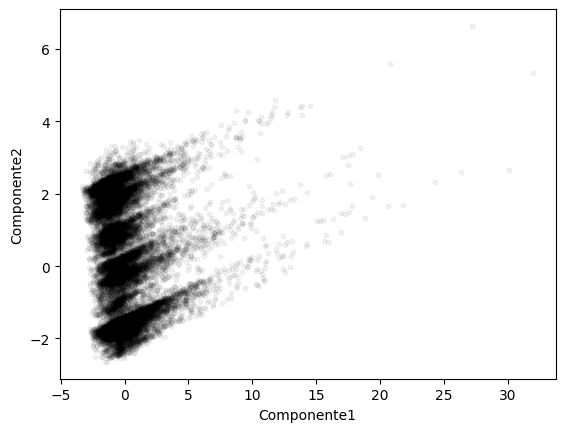

In [37]:
plt.scatter(X_componentes['PC1'], X_componentes['PC2'],  alpha=0.05, s=10, c='k')
plt.xlabel('Componente1')
plt.ylabel('Componente2')
plt.show()

### Varianza explicada

Si la primera componente principal se obtiene con el eigenvalor que máximiza la varianza.

La varianza explicada por cada componente principal 

$$varianza_i = \frac{Eigenvalor_i}{\Sigma{Eigenvalores}}$$


In [28]:
objeto_pca.explained_variance_ratio_[0]

0.30154289877695384

In [29]:
objeto_pca.explained_variance_ratio_[1]

0.19738656527320114

In [30]:
objeto_pca.explained_variance_ratio_[12]

1.423031928111431e-32

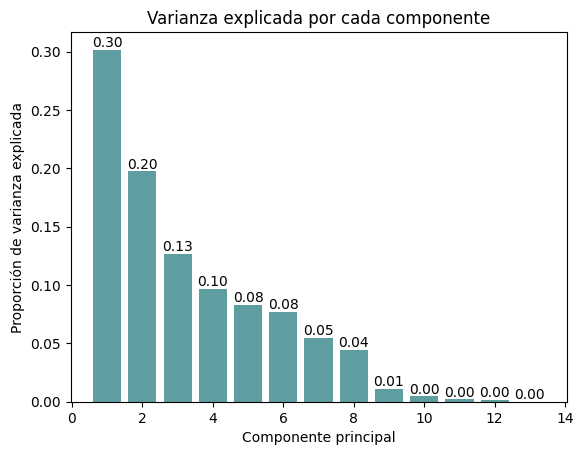

In [36]:
plt.bar(range(1, len(objeto_pca.explained_variance_ratio_)+1), objeto_pca.explained_variance_ratio_, 
        alpha=1, align='center', label='Individual', color='cadetblue')

for i, varianza in enumerate(objeto_pca.explained_variance_ratio_):
    plt.text(i+1, varianza, f'{varianza:.2f}', ha='center', va='bottom')
plt.ylabel('Proporción de varianza explicada')
plt.xlabel('Componente principal')
plt.title('Varianza explicada por cada componente')
plt.show()

### Entendiendo primera componente

In [43]:
componente1 = pd.DataFrame({
    'features': X.columns,
    'pesos': objeto_pca.components_[0]
})
componente1.sort_values(by='pesos', ascending=False)

,features,pesos
6,households,0.486598
4,total_bedrooms,0.484269
3,total_rooms,0.478316
5,population,0.469222
0,longitude,0.101538
8,ocean_proximity_1H OCEAN,0.057847
7,median_income,0.048330
12,ocean_proximity_NEAR OCEAN,-0.001458
10,ocean_proximity_ISLAND,-0.005786
9,ocean_proximity_INLAND,-0.012784


### Entendiendo segunda componente

In [44]:
objeto_pca.explained_variance_ratio_[1]

0.19738656527320114

In [45]:
componente1 = pd.DataFrame({
    'features': X.columns,
    'pesos': objeto_pca.components_[1]
})
componente1.sort_values(by='pesos', ascending=False)

,features,pesos
1,latitude,0.563595
11,ocean_proximity_NEAR BAY,0.320393
9,ocean_proximity_INLAND,0.290002
3,total_rooms,0.100905
4,total_bedrooms,0.090788
6,households,0.085387
5,population,0.052088
10,ocean_proximity_ISLAND,-0.009436
2,housing_median_age,-0.026872
12,ocean_proximity_NEAR OCEAN,-0.057037


### Obtener las componentes principales

pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [114]:

# Transformar los datos

# Crear DataFrame con nombres de columnas


### Visualizar componentes principales

## Modelos de datos

### Primero con todos los features

In [46]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

model = XGBRegressor().fit(X,y)
y_pred = model.predict(X)
r2_score(y, y_pred)

0.9310218522655087

### Ahora con las componentes principales

In [54]:
X_pca12 = X_componentes[['PC1', 'PC2']]

model = XGBRegressor().fit(X_pca12,y)
y_pred = model.predict(X_pca12)
r2_score(y, y_pred)

0.3312680277358444

### Ahora solo con las primeras 3 componentes

In [56]:
X_pca12 = X_componentes[['PC1', 'PC2', 'PC3', 'PC4']]

model = XGBRegressor().fit(X_pca12,y)
y_pred = model.predict(X_pca12)
r2_score(y, y_pred)

0.7924226350010758

In [68]:
model = XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=500).fit(X_componentes, y)
y_pred = model.predict(X_componentes)
r2_score(y, y_pred)

0.9357612529511816

Text(0, 0.5, 'Importancia')

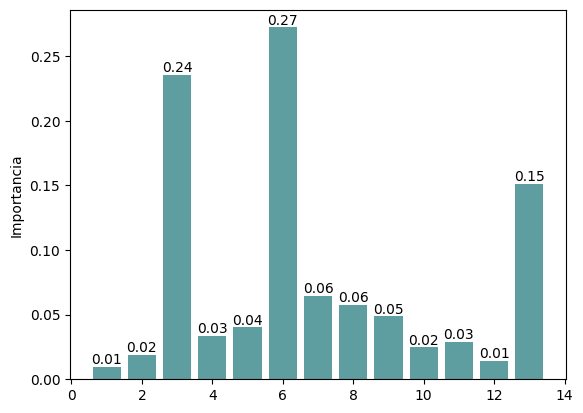

In [69]:
importancias = pd.DataFrame({
    'features': X.columns,
    'pesos': model.feature_importances_
})

plt.bar(range(1, len(importancias)+1), importancias['pesos'],
        alpha=1, align='center', label='Individual', color='cadetblue')
for i, varianza in enumerate(importancias['pesos']):
    plt.text(i+1, varianza, f'{varianza:.2f}', ha='center', va='bottom')
plt.ylabel('Importancia')


In [64]:
X_pca12 = X_componentes[['PC3', 'PC6', 'PC13']]

model = XGBRegressor().fit(X_pca12,y)
y_pred = model.predict(X_pca12)
r2_score(y, y_pred)

0.7637000241917392

### Conclusión: a medida que agregamos más componentes aumenta el poder predictivo pero se pierde el objetivo inicial que es tener menos dimensiones

### Clustering + PCA

In [77]:
from sklearn.cluster import KMeans

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=2, random_state=42))
])
pipeline.fit(X)

c:\Users\epile\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=2, random_state=42))])

In [78]:
X_componentes['cluster'] = pipeline.predict(X) + 1

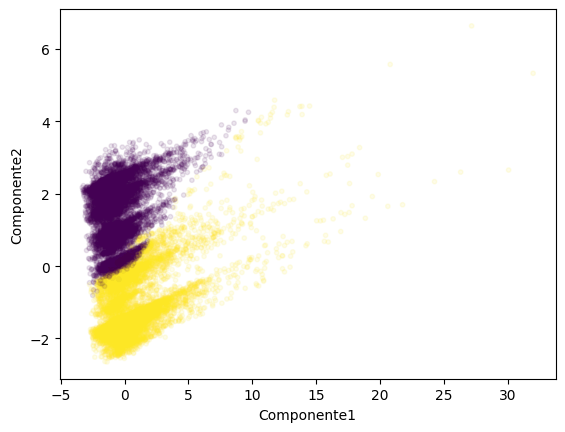

In [82]:
plt.scatter(X_componentes['PC1'], X_componentes['PC2'],  alpha=0.10, s=10, c=X_componentes['cluster'], cmap='viridis')
plt.xlabel('Componente1')
plt.ylabel('Componente2')
plt.show()